Activity Title : Early Detection of Epilepsy 

Step 1: Downloading the Dataset:
use the following link https://neureka-challenge.com/ , you will find all the information in order to understand how to download the dataset.        

Step 2: Installing MNE-Python

MNE-Python is an open-source Python module for processing, analysis, and visualization of functional neuroimaging data (such as EEG signals). 
use the following link to install:
https://mne.tools/dev/install/mne_python.html#installing-python

Step 3: Preparing the dataset 

When you downloading the dataset, you have to looking for the following:
    
1. The EDF files (training & validation):

The edf folder that contain two sub-folders( train for training dataset and dev for validation dataset). 

2. The Labels files:

The _DOCS folder that contain tow text files ( ref_train.txt that including the labels and the event's time for each edf file for training dataset and ref_dev.txt that including the labels and the event's time for each edf file for validation dataset).


In [1]:
## Loading the Labels' files

import pandas as pd


dir_train_label='data/_DOCS/ref_train.txt'
train_label = pd.read_csv(dir_train_label, sep=" ", header=None)
train_label.columns = ['edf_Name', 'Start_ts_evnt','End_ts_evnt','Label','Conf']

In [2]:
train_label.head()

,edf_Name,Start_ts_evnt,End_ts_evnt,Label,Conf
0,00000077_s003_t000,0.0,1205.0,bckg,1.0
1,00000254_s005_t000,0.0,1442.0,bckg,1.0
2,00000254_s006_t001,0.0,1197.0,bckg,1.0
3,00000254_s007_t000,0.0,1244.0,bckg,1.0
4,00000272_s007_t000,0.0,194.0,bckg,1.0


In [3]:
train_label['Label'][36]

'seiz'

In [4]:
dir_valid_label='data/_DOCS/ref_dev.txt'
valid_label = pd.read_csv(dir_valid_label, sep=" ", header=None)
valid_label.columns = ['edf_Name', 'Start_ts_evnt','End_ts_evnt','Label','Conf']

In [5]:
valid_label.head()

,edf_Name,Start_ts_evnt,End_ts_evnt,Label,Conf
0,00000258_s002_t000,0.0,20.0000,bckg,1.0
1,00000258_s002_t002,0.0,272.0000,bckg,1.0
2,00000258_s003_t000,0.0,234.0000,bckg,1.0
3,00000258_s003_t001,0.0,224.0000,bckg,1.0
4,00000258_s003_t002,0.0,8.8275,bckg,1.0


In [6]:
## Create the list that including all the edf files for training and validation datasets
import numpy as np
train_edf = train_label["edf_Name"]
valid_edf = valid_label["edf_Name"]

list_train_edf = []
list_valid_edf = []
i=0
while i < len(train_edf):
    list_train_edf.append(train_edf.iloc[i])
    i+=1

# TODO: complete for the validation
i=0
while i < len(valid_edf):
    list_valid_edf.append(valid_edf.iloc[i])
    i+=1

In [7]:
len(list_train_edf)

9337

In [8]:
len(list_valid_edf)

2359

In [9]:
# Create the selected channels' names list 

tcp_ar = ['EEG FP1-REF', 'EEG FP2-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG C3-REF', 'EEG C4-REF', 'EEG P3-REF', 'EEG P4-REF', 'EEG O1-REF', 'EEG O2-REF', 'EEG F8-REF', 'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF', 'EEG T6-REF', 'EEG FZ-REF', 'EEG CZ-REF']
tcp_le = ['EEG FP1-LE', 'EEG FP2-LE', 'EEG F3-LE', 'EEG F4-LE', 'EEG C3-LE', 'EEG C4-LE', 'EEG P3-LE', 'EEG P4-LE', 'EEG O1-LE', 'EEG O2-LE', 'EEG F7-LE', 'EEG F8-LE', 'EEG T3-LE', 'EEG T4-LE', 'EEG T5-LE', 'EEG T6-LE',  'EEG CZ-LE']
tcp_ar_a = ['EEG FP1-REF', 'EEG FP2-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG C3-REF', 'EEG C4-REF', 'EEG P3-REF', 'EEG P4-REF', 'EEG O1-REF', 'EEG O2-REF', 'EEG F7-REF', 'EEG F8-REF', 'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF', 'EEG T6-REF', 'EEG CZ-REF']
print(len(tcp_ar))
print(len(tcp_le))
print(len(tcp_ar_a))

17
17
17


In [10]:
# this function helps to find the file by searching through the given path

import os, fnmatch

def find(pattern, path):
    result = []
    for root, dirs, files in os.walk(path):
        for name in files:
            if fnmatch.fnmatch(name, pattern):
                result.append(os.path.join(root, name))
    return result

In [11]:
# create the list of edf files path ( train/valid) by using the find function above
#pathy = " " # insert the path of two datasets ( /train & /edv )
pathy = 'data/edf/train/'
edf_train_path = []
i=0
while i < len(list_train_edf[1:50]):
    edf_train_path.append(find(list_train_edf[i]+'.edf',pathy))
    i+=1
    
## TODO: complete the edf_valid_path
pathy = 'data/edf/dev/'
edf_valid_path = []
i=0
while i < len(list_valid_edf[1:50]):
    edf_valid_path.append(find(list_valid_edf[i]+'.edf',pathy))
    i+=1

In [12]:
edf_train_path[0]

['data/edf/train/01_tcp_ar/000/00000077/s003_2010_01_21/00000077_s003_t000.edf']

In [13]:
edf_valid_path[0]

['data/edf/dev/01_tcp_ar/002/00000258/s002_2003_07_21/00000258_s002_t000.edf']

In [14]:
## Load and read the edf file by using mne module 

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne
from mne.io import concatenate_raws, read_raw_edf

%matplotlib inline 


In [15]:
## TODO: Create function for reading the edf file, resampling it to 250Hz,...
## save to dataframe, using train_label & valid_label to extract the event time of each label
## (background, pre-seizure and seizure) and return the dic or dataframe with features and labels

def xyz(path,sFreq = 250,low_freq = 0.5 ,hi_freq = 40):
   # sFreq: sampling frequency = 250 Hz
   # low_freq,hi_freq for bandpass filter to extract the features frequency-based 
   # path = edf_train_path
    df_b = pd.DataFrame()
    df_s = pd.DataFrame()
    df_pz = pd.DataFrame()
    i = 0
    while i < len(path):
        
        raw = mne.io.read_raw_edf((', '.join(path[i])),preload=True,)
        raw = raw.resample(sFreq, npad='auto')
        raw = raw.filter(low_freq, hi_freq, fir_design='firwin', skip_by_annotation='edge')
        raw = raw.to_data_frame() # save to dataframe
        
        ## TODO using train_label & valid_label to extract the event time of each label
## (background, pre-seizure and seizure) and return the dic or dataframe with features and labels
        
        if 'EEG FP1-LE' in raw.columns:
            j=0 
            feat_b = []
            feat_s = []
            feat_pz= []
            while j < len(tcp_le):
                feat = raw[tcp_le[j]].tolist()
                if train_label['Label'][i] == 'bckg':
                    feat1 = feat[slice(int(train_label['Start_ts_evnt'][i].item())+10*250 , 15*250)]
                    for x in feat1:
                        feat_b.append(x)
                        
                elif train_label['Label'][i] == 'seiz':
                    feat2 = feat[slice(int(train_label['Start_ts_evnt'][i].item()),int(train_label['Start_ts_evnt'][i].item())+5*250)]
                    for x in feat2:
                        feat_s.append(x)
                    
                    feat3 = feat[slice(int(train_label['Start_ts_evnt'][i].item())-5*250,-int(train_label['Start_ts_evnt'][i].item()))]
                    for x in feat3:
                        feat_pz.append(x)
                j+=1
                                 
            ft_b = pd.DataFrame([feat_b])
            df_b = df_b.append(ft_b)
            ft_s = pd.DataFrame([feat_s])
            df_s = df_s.append(ft_s)
            ft_pz = pd.DataFrame([feat_pz])
            df_pz = df_pz.append(ft_pz)
            
        else:
            
            j=0 
            feat_b = []
            feat_s = []
            feat_pz= []
            while j < len(tcp_ar):
                
                feat = raw[tcp_ar[j]].tolist()
                
                if train_label['Label'][i] == 'bckg':
                    feat1 = feat[slice(int(train_label['Start_ts_evnt'][i].item())+10*250 , 15*250)]
                    for x in feat1:
                        feat_b.append(x)
                        
                elif train_label['Label'][i] == 'seiz':
                    feat2 = feat[slice(int(train_label['Start_ts_evnt'][i].item()),int(train_label['Start_ts_evnt'][i].item())+5*250)]
                    for x in feat2:
                        feat_s.append(x)
                    
                    feat3 = feat[slice(int(train_label['Start_ts_evnt'][i].item())-5*250,-int(train_label['Start_ts_evnt'][i].item()))]
                    for x in feat3:
                        feat_pz.append(x)
                    
                j+=1
                                 
        ft_b = pd.DataFrame([feat_b])
        df_b = df_b.append(ft_b)
        ft_s = pd.DataFrame([feat_s])
        df_s = df_s.append(ft_s)
        ft_pz = pd.DataFrame([feat_pz])
        df_pz = df_pz.append(ft_pz)
        i+=1
    
        #df = feat_b.append(feat_s)
        #df.append(feat_pz)
    return df_b,df_s,df_pz

In [16]:
df_b,df_s,df_pz= xyz(edf_train_path)
df_b_dev,df_s_dev,df_pz_dev= xyz(edf_valid_path)


Extracting EDF parameters from /home/tawfeeq/code/ML/data/edf/train/01_tcp_ar/000/00000077/s003_2010_01_21/00000077_s003_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 301249  =      0.000 ...  1204.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 sec)

Extracting EDF parameters from /home/tawfeeq/code/ML/data/edf/train/01_tcp_ar/002/00000254/s005_2010_11_15/00000254_s005_t000.edf...
EDF file detected
Setting ch

- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 sec)

Extracting EDF parameters from /home/tawfeeq/code/ML/data/edf/train/01_tcp_ar/002/00000272/s008_2003_07_03/00000272_s008_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 121999  =      0.000 ...   304.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 sec)

Extracting E

- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 sec)

Extracting EDF parameters from /home/tawfeeq/code/ML/data/edf/train/01_tcp_ar/004/00000458/s011_2014_06_24/00000458_s011_t003.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 153855  =      0.000 ...   600.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequ


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 sec)

Extracting EDF parameters from /home/tawfeeq/code/ML/data/edf/train/01_tcp_ar/004/00000458/s012_2014_06_25/00000458_s012_t004.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 153855  =      0.000 ...   600.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hammin

Creating raw.info structure...
Reading 0 ... 73599  =      0.000 ...   183.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 sec)

Extracting EDF parameters from /home/tawfeeq/code/ML/data/edf/train/01_tcp_ar/004/00000492/s003_2003_07_18/00000492_s003_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 73599  =      0.000 ...   183.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from


Extracting EDF parameters from /home/tawfeeq/code/ML/data/edf/dev/01_tcp_ar/002/00000258/s002_2003_07_21/00000258_s002_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7999  =      0.000 ...    19.997 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 sec)

Extracting EDF parameters from /home/tawfeeq/code/ML/data/edf/dev/01_tcp_ar/002/00000258/s002_2003_07_21/00000258_s002_t002.edf...
EDF file detected
Setting channel

- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 sec)

Extracting EDF parameters from /home/tawfeeq/code/ML/data/edf/dev/01_tcp_ar/002/00000258/s003_2003_07_22/00000258_s003_t004.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 69999  =      0.000 ...   174.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 sec)

Extracting EDF 

- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 sec)

Extracting EDF parameters from /home/tawfeeq/code/ML/data/edf/dev/01_tcp_ar/006/00000629/s004_2003_07_24/00000629_s004_t003.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 125599  =      0.000 ...   313.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 1

- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 sec)

Extracting EDF parameters from /home/tawfeeq/code/ML/data/edf/dev/01_tcp_ar/010/00001027/s004_2004_01_30/00001027_s004_t002.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 84799  =      0.000 ...   211.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transi

Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 sec)

Extracting EDF parameters from /home/tawfeeq/code/ML/data/edf/dev/01_tcp_ar/022/00002289/s003_2012_03_12/00002289_s003_t004.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 307711  =      0.000 ...   600.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed 

In [17]:
# Background Dataframe (features,target)
df_feat_b = df_b.dropna()
df_feat_b.head()
#df_feat_b['Label'] = 'bckg'



,0,1,2,3,4,5,6,7,8,9,...,21240,21241,21242,21243,21244,21245,21246,21247,21248,21249
0,13.583620,13.676094,13.600835,14.181311,15.667526,17.915342,20.665114,23.519884,25.790085,26.743195,...,-39.108204,-39.179194,-39.085698,-38.395251,-36.830496,-34.388235,-31.339440,-28.113392,-25.113471,-22.551558
0,-1309.107853,-1318.957696,-1322.902085,-1326.147127,-1332.173340,-1340.706616,-1349.218614,-1355.917499,-1361.258724,-1366.948434,...,2.775509,-0.141358,1.045202,5.331259,10.147087,13.476493,14.819768,14.558394,12.842665,9.464605
0,2.914161,1.590882,-0.020890,-1.778035,-3.519420,-5.092240,-6.292474,-6.847355,-6.542990,-5.433010,...,1.544954,0.988891,0.618023,0.419069,0.243810,0.032271,-0.076679,0.125102,0.664998,1.279810
0,5.454314,2.472440,-1.704146,-3.170010,0.852635,9.117344,16.441794,17.506300,11.437249,3.004154,...,29.252211,30.227733,31.508770,32.008501,31.312387,30.262266,30.615903,33.576708,38.127551,40.953090
0,4.099143,2.044323,1.723583,2.102997,1.539621,-0.536260,-3.154387,-4.823918,-4.847987,-3.720888,...,7.542314,7.693409,6.900950,5.710828,5.444382,6.561429,7.747034,6.824235,2.690702,-3.608169


In [18]:
df_feat_b_dev = df_b_dev.dropna()
df_feat_b_dev.head()

,0,1,2,3,4,5,6,7,8,9,...,21240,21241,21242,21243,21244,21245,21246,21247,21248,21249
0,10.956261,11.269163,10.220378,8.274293,6.457676,5.564175,5.536853,5.648567,5.284422,4.617832,...,-8.497822,-8.557939,-8.222824,-7.251941,-5.808365,-4.497999,-3.982500,-4.485559,-5.595755,-6.598443
0,4.453836,5.531976,7.948571,10.269431,10.758902,9.011733,6.550341,5.683181,7.539311,11.044077,...,9.459603,7.821264,5.896818,5.091449,5.673010,6.611797,6.456952,4.608547,1.903612,0.047847
0,-0.886017,-3.872055,-7.075264,-8.169737,-6.379674,-3.054216,-0.461541,0.077013,-0.981089,-2.164033,...,4.302012,4.646857,3.980307,2.972155,2.466152,2.761539,3.509120,4.134131,4.372705,4.366539
0,2.895028,1.611009,0.759862,0.493440,0.603573,0.825232,1.206522,2.083754,3.639818,5.533313,...,-0.581795,-0.587248,-1.492587,-2.938803,-4.013773,-3.975705,-2.867468,-1.437269,-0.517561,-0.374314
0,3.818645,3.149302,3.588187,4.286721,4.053133,2.384126,0.023049,-1.510382,-1.087910,1.078611,...,1.955168,2.884585,1.954371,-0.336054,-2.613914,-3.683092,-3.375387,-2.510638,-2.168925,-2.859923


In [19]:
(21250/250)/17

5.0

In [20]:
# Seizure Dataframe (features,target)
df_feat_s = df_s.dropna()
df_feat_s.head()
#df_feat_s['Label'] = 'seiz'


,0,1,2,3,4,5,6,7,8,9,...,21240,21241,21242,21243,21244,21245,21246,21247,21248,21249
0,-2.734640,-2.551355,-2.293650,-1.966173,-1.571032,-1.013175,-0.136454,1.096071,2.458958,3.568715,...,14.567909,16.803974,17.448436,16.830941,15.970225,16.131393,18.281019,22.559511,27.931085,32.348858
0,8.825453,8.468153,7.808286,7.164391,6.819071,6.842722,7.102181,7.403234,7.625199,7.750529,...,10.885023,10.596846,10.429699,10.437901,10.678813,11.115329,11.564571,11.741778,11.384965,10.411532
0,-2.386603,-2.534650,-3.023141,-3.625949,-4.119572,-4.416656,-4.612456,-4.894409,-5.339604,-5.761111,...,0.575734,1.194999,1.911467,2.620613,3.188410,3.515035,3.635155,3.729476,3.984392,4.413820
0,2.850367,2.786342,2.591802,2.709709,3.256378,3.932367,4.359859,4.485432,4.615071,5.067003,...,14.394377,14.064770,13.229123,11.822397,9.944386,7.597108,4.782588,1.883555,-0.234847,-0.768290
0,-4.730959,-6.185953,-7.634356,-8.551284,-8.663131,-8.191887,-7.764652,-7.997293,-9.053872,-10.544511,...,6.378564,6.679688,6.340206,5.530532,4.784131,4.578852,4.972559,5.619307,6.122623,6.363360


In [21]:
df_feat_s_dev = df_s_dev.dropna()
df_feat_s_dev.head()

,0,1,2,3,4,5,6,7,8,9,...,21240,21241,21242,21243,21244,21245,21246,21247,21248,21249
0,-4.675477,-2.219025,1.123697,4.633637,6.508912,5.412631,1.898930,-1.676876,-2.783306,-0.495758,...,-4.633185,-4.195167,-3.728064,-3.402564,-2.814708,-1.547471,0.222008,1.704837,2.120281,1.369611
0,-2.911745,-1.380908,0.017385,-0.484608,-2.675693,-4.046401,-2.058567,3.100176,8.207412,9.727656,...,-2.249986,-1.902977,-2.006258,-2.570147,-3.547759,-4.714606,-5.583037,-5.570591,-4.407923,-2.472929
0,-78.500442,-5.702471,71.883713,98.182276,59.291256,-3.709515,-32.632918,-6.610787,39.392558,50.590935,...,-0.827181,0.288451,-1.369793,-3.822843,-4.650074,-3.177966,-0.587837,1.682375,3.167220,4.002265
0,-13.159901,-11.830567,-9.413487,-6.622873,-4.525530,-3.841658,-4.490476,-5.762579,-6.994831,-8.167627,...,-8.835975,-8.582542,-8.539055,-8.735196,-9.175426,-9.877864,-10.815904,-11.833080,-12.647639,-12.988629
0,11.701618,8.944803,5.495096,2.345618,0.114903,-0.940435,-0.788562,0.579335,3.226863,7.083296,...,-6.639492,-4.997425,-4.592866,-5.405857,-6.537248,-6.932611,-6.350140,-5.668769,-6.118337,-8.024493


In [22]:
# pre-Seizure Dataframe (features,target)
df_feat_pz = df_pz.dropna()
df_feat_pz.head()
#df_feat_pz['Label'] = 'pre-seiz'

#print(df_feat_pz.dtypes)

,0,1,2,3,4,5,6,7,8,9,...,21036,21037,21038,21039,21040,21041,21042,21043,21044,21045
0,8.905883,8.758427,8.403819,8.223724,8.42067,8.904322,9.429823,9.831089,10.125868,10.421549,...,-1.281771,-3.408902,-5.253094,-6.527473,-7.491537,-8.56837,-9.796126,-10.670526,-10.547622,-9.221112


In [23]:
df_feat_pz_dev = df_pz_dev.dropna()
df_feat_pz_dev.head()

,0,1,2,3,4,5,6,7,8,9,...,21036,21037,21038,21039,21040,21041,21042,21043,21044,21045
0,22.130088,25.085179,27.084496,27.617002,26.586673,24.244655,21.039132,17.50526,14.184453,11.474873,...,0.162723,0.151982,0.141226,0.130457,0.119702,0.108923,0.098102,0.087238,0.076337,0.065408


In [24]:
## TODO: Apllying PCA reduce Dim
import sys
tcp_ch = ['CH1','CH2','CH3','CH4','CH5','CH6','CH7','CH8','CH9','CH10','CH11','CH12','CH13','CH14','CH15','CH16','CH17','TIME','FREQ','LABEL']
train_data = []
valid_data = []
def convert_data(dataIn,dataOut,label):
    i=0
    freq_counter = 0
    index = 0
    for (idx,row) in dataIn.iterrows():
        for j in range(0,len(dataIn.columns),17):
            df = row.iloc[0+j:17+j]
            df['TIME'] = index
            df['FREQ'] = freq_counter
            df['LABEL'] = label
            df.reset_index(drop=True, inplace=True)
            dataOut.append(df)
            if j%17 == 0:
                freq_counter+=1
            if j==4250 or j==8500 or j==12750 or j==17000:
                index+=1
                freq_counter = 0
        sys.stdout.write("\rProgress: {:2.1f}%".format(100 * (i+1)/float(len(dataIn))))
        sys.stdout.flush()
        i+=1
        #print(freq_counter)
        freq_counter = 0
        index = 0
        
    
    return dataOut

    
    
print('Training Background Data to be converted')   
train_data = convert_data(df_feat_b,train_data,'BCKG')
print('\nTraining Seizer Data to be converted')
train_data = convert_data(df_feat_s,train_data,'SEIZ')
print('\nTraining Pre-Seizer Data to be converted')
train_data = convert_data(df_feat_pz,train_data,'PRE-SEIZ')


print('\nValidation Background Data to be converted')   
valid_data = convert_data(df_feat_b_dev,valid_data,'BCKG')
print('\nValidation Seizer Data to be converted')
valid_data = convert_data(df_feat_s_dev,valid_data,'SEIZ')
print('\nValidation Pre-Seizer Data to be converted')
valid_data = convert_data(df_feat_pz_dev,valid_data,'PRE-SEIZ')



Training Background Data to be converted
Progress: 100.0%
Training Seizer Data to be converted
Progress: 100.0%
Training Pre-Seizer Data to be converted
Progress: 100.0%
Validation Background Data to be converted
Progress: 100.0%
Validation Seizer Data to be converted
Progress: 100.0%
Validation Pre-Seizer Data to be converted
Progress: 100.0%

In [25]:
train = pd.DataFrame(data=train_data) 
train.columns = tcp_ch

valid = pd.DataFrame(data=valid_data) 
valid.columns = tcp_ch

#print(train.dtypes)
valid.head()

#sort = valid.sort_values('FREQ',ascending=False)
#sort.head()


,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,CH9,CH10,CH11,CH12,CH13,CH14,CH15,CH16,CH17,TIME,FREQ,LABEL
0,10.956261,11.269163,10.220378,8.274293,6.457676,5.564175,5.536853,5.648567,5.284422,4.617832,4.489699,5.594112,7.762167,10.055927,11.583511,12.222487,12.519960,0.0,0.0,BCKG
0,12.903713,13.058871,12.155567,9.743518,6.399459,3.493130,2.186197,2.557851,3.614619,4.173172,3.753446,2.741290,1.746067,0.950223,0.089341,-1.018521,-2.087842,0.0,1.0,BCKG
0,-2.567878,-2.221408,-1.407348,-0.736204,-0.408058,0.059384,1.347281,3.541453,5.841305,7.173233,7.168610,6.558512,6.541976,7.749323,9.698342,11.255229,11.626972,0.0,2.0,BCKG
0,11.018440,10.367407,10.471782,11.285657,12.027671,11.935940,10.929928,9.589035,8.591664,8.169731,8.050839,7.817755,7.290593,6.630640,6.154143,6.079476,6.405255,0.0,3.0,BCKG
0,6.999128,7.731613,8.504277,9.174988,9.544588,9.437933,8.850611,8.006978,7.291289,7.021218,7.213519,7.506945,7.422103,6.757244,5.780057,4.993272,4.709652,0.0,4.0,BCKG


In [26]:
## TODO: Dummy
train = train.dropna()
valid = valid.dropna()
train = train.reset_index(drop=True) 
valid = valid.reset_index(drop=True)

#train.CH3 = train.CH3.astype(float)
#valid.CH3 = valid.CH3.astype(float)
train['TIME'] = train['TIME'].astype('uint8')
valid['TIME'] = valid['TIME'].astype('uint8')
train['FREQ'] = train['FREQ'].astype('uint8')
valid['FREQ'] = valid['FREQ'].astype('uint8')
train['LABEL'] = train['LABEL'].astype('string')
valid['LABEL'] = valid['LABEL'].astype('string')
dummy_fields = ['TIME', 'FREQ', 'LABEL']
for each in dummy_fields:
    dummies = pd.get_dummies(train[each], prefix=each, drop_first=False)
    train = pd.concat([train, dummies], axis=1)

for each in dummy_fields:
    dummies = pd.get_dummies(valid[each], prefix=each, drop_first=False)
    valid = pd.concat([valid, dummies], axis=1)
 
data = train.drop(dummy_fields, axis=1)
data_valid = valid.drop(dummy_fields, axis=1)
#print(data.dtypes)
data.head()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,CH9,CH10,...,FREQ_244,FREQ_245,FREQ_246,FREQ_247,FREQ_248,FREQ_249,FREQ_250,LABEL_BCKG,LABEL_PRE-SEIZ,LABEL_SEIZ
0,13.583620,13.676094,13.600835,14.181311,15.667526,17.915342,20.665114,23.519884,25.790085,26.743195,...,0,0,0,0,0,0,0,1,0,0
1,27.679230,26.591844,26.909982,27.687421,27.123398,24.438446,20.804077,18.286828,17.803172,18.221373,...,0,0,0,0,0,0,0,1,0,0
2,11.924506,10.650890,10.916151,13.317408,16.486170,18.273575,17.639752,15.483931,13.763126,13.808001,...,0,0,0,0,0,0,0,1,0,0
3,14.612731,15.478522,16.097093,16.328960,16.249582,16.144648,16.476425,17.622062,19.403866,20.866685,...,0,0,0,0,0,0,0,1,0,0
4,14.503767,13.759180,13.790640,15.639975,18.290593,19.169321,16.390215,10.692073,5.173129,2.976347,...,0,0,0,0,0,0,0,1,0,0


In [27]:
#print(data_valid.dtypes)
data_valid.head()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,CH9,CH10,...,FREQ_244,FREQ_245,FREQ_246,FREQ_247,FREQ_248,FREQ_249,FREQ_250,LABEL_BCKG,LABEL_PRE-SEIZ,LABEL_SEIZ
0,10.956261,11.269163,10.220378,8.274293,6.457676,5.564175,5.536853,5.648567,5.284422,4.617832,...,0,0,0,0,0,0,0,1,0,0
1,12.903713,13.058871,12.155567,9.743518,6.399459,3.493130,2.186197,2.557851,3.614619,4.173172,...,0,0,0,0,0,0,0,1,0,0
2,-2.567878,-2.221408,-1.407348,-0.736204,-0.408058,0.059384,1.347281,3.541453,5.841305,7.173233,...,0,0,0,0,0,0,0,1,0,0
3,11.018440,10.367407,10.471782,11.285657,12.027671,11.935940,10.929928,9.589035,8.591664,8.169731,...,0,0,0,0,0,0,0,1,0,0
4,6.999128,7.731613,8.504277,9.174988,9.544588,9.437933,8.850611,8.006978,7.291289,7.021218,...,0,0,0,0,0,0,0,1,0,0


In [28]:


## TODO: Scalling

quant_features = ['CH1','CH2','CH3','CH4','CH5','CH6','CH7','CH8','CH9','CH10','CH11','CH12','CH13','CH14','CH15','CH16','CH17']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std

    scaled_features = {}
for each in quant_features:
    mean, std = data_valid[each].mean(), data_valid[each].std()
    scaled_features[each] = [mean, std]
    data_valid.loc[:, each] = (data_valid[each] - mean)/std

# Separate the data into features and targets
target_fields = ['LABEL_BCKG','LABEL_PRE-SEIZ', 'LABEL_SEIZ']
train_features, train_targets = data.drop(target_fields, axis=1), data[target_fields]
valid_features, valid_targets = data_valid.drop(target_fields, axis=1), data_valid[target_fields]
#print(train_features.columns)
train_features.head()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,CH9,CH10,...,FREQ_241,FREQ_242,FREQ_243,FREQ_244,FREQ_245,FREQ_246,FREQ_247,FREQ_248,FREQ_249,FREQ_250
0,0.055146,0.055598,0.055175,0.057821,0.064766,0.075326,0.088295,0.101772,0.112521,0.117064,...,0,0,0,0,0,0,0,0,0,0
1,0.121387,0.116303,0.117742,0.121315,0.118612,0.105981,0.088948,0.077182,0.074987,0.077007,...,0,0,0,0,0,0,0,0,0,0
2,0.047349,0.041379,0.042554,0.053760,0.068614,0.077010,0.074079,0.064012,0.056002,0.056263,...,0,0,0,0,0,0,0,0,0,0
3,0.059983,0.064069,0.066910,0.067918,0.067502,0.067005,0.068612,0.074058,0.082509,0.089441,...,0,0,0,0,0,0,0,0,0,0
4,0.059470,0.055988,0.056067,0.064679,0.077095,0.081219,0.068207,0.041495,0.015634,0.005349,...,0,0,0,0,0,0,0,0,0,0


In [29]:
## TODO: train and validate your model using neural network
def MSE(y, Y):
    return np.mean((y-Y)**2)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

import numpy as np


class NeuralNetwork(object):
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_input_to_hidden = np.random.normal(0.0, self.input_nodes**-0.5, 
                                       (self.input_nodes, self.hidden_nodes))

        self.weights_hidden_to_output = np.random.normal(0.0, self.hidden_nodes**-0.5, 
                                       (self.hidden_nodes, self.output_nodes))
        self.lr = learning_rate
        
        #### TODO: Set self.activation_function to your implemented sigmoid function ####
        #
        # Note: in Python, you can define a function with a lambda expression,
        # as shown below.
        self.activation_function = lambda x : 1 / (1 + np.exp(-x))  # Replace 0 with your sigmoid calculation.
        
        ### If the lambda code above is not something you're familiar with,
        # You can uncomment out the following three lines and put your 
        # implementation there instead.
        #
        #def sigmoid(x):
        #    return 0  # Replace 0 with your sigmoid calculation here
        #self.activation_function = sigmoid
                    

    def train(self, features, targets):
        ''' Train the network on batch of features and targets. 
        
            Arguments
            ---------
            
            features: 2D array, each row is one data record, each column is a feature
            targets: 1D array of target values
        
        '''
        n_records = features.shape[0]
        delta_weights_i_h = np.zeros(self.weights_input_to_hidden.shape)
        delta_weights_h_o = np.zeros(self.weights_hidden_to_output.shape)
        for X, y in zip(features, targets):
            
            final_outputs, hidden_outputs = self.forward_pass_train(X)  # Implement the forward pass function below
            # Implement the backproagation function below
            delta_weights_i_h, delta_weights_h_o = self.backpropagation(final_outputs, hidden_outputs, X, y, 
                                                                        delta_weights_i_h, delta_weights_h_o)
        self.update_weights(delta_weights_i_h, delta_weights_h_o, n_records)


    def forward_pass_train(self, X):
        ''' Implement forward pass here 
         
            Arguments
            ---------
            X: features batch

        '''
        #### Implement the forward pass here ####
        ### Forward pass ###
        # TODO: Hidden layer - Replace these values with your calculations.
        hidden_inputs = np.dot(X, self.weights_input_to_hidden) # signals into hidden layer
        hidden_outputs = self.activation_function(hidden_inputs) # signals from hidden layer

        # TODO: Output layer - Replace these values with your calculations.
        final_inputs = np.dot(hidden_outputs, self.weights_hidden_to_output) # signals into final output layer
        final_outputs = final_inputs # signals from final output layer
        
        return final_outputs, hidden_outputs

    def backpropagation(self, final_outputs, hidden_outputs, X, y, delta_weights_i_h, delta_weights_h_o):
        ''' Implement backpropagation
         
            Arguments
            ---------
            final_outputs: output from forward pass
            y: target (i.e. label) batch
            delta_weights_i_h: change in weights from input to hidden layers
            delta_weights_h_o: change in weights from hidden to output layers

        '''
        #### Implement the backward pass here ####
        ### Backward pass ###

        # TODO: Output error - Replace this value with your calculations.
        error = y - final_outputs # Output layer error is the difference between desired target and actual output.
        
        # TODO: Calculate the hidden layer's contribution to the error
        hidden_error = np.dot(error, self.weights_hidden_to_output.T)
        
        # TODO: Backpropagated error terms - Replace these values with your calculations.
        output_error_term = error
        
        hidden_error_term = hidden_error * hidden_outputs * (1 - hidden_outputs)
        
        # Weight step (input to hidden)
        delta_weights_i_h += hidden_error_term * X[:, None]
        # Weight step (hidden to output)
        delta_weights_h_o += output_error_term * hidden_outputs[:, None]
        return delta_weights_i_h, delta_weights_h_o

    def update_weights(self, delta_weights_i_h, delta_weights_h_o, n_records):
        ''' Update weights on gradient descent step
         
            Arguments
            ---------
            delta_weights_i_h: change in weights from input to hidden layers
            delta_weights_h_o: change in weights from hidden to output layers
            n_records: number of records

        '''
        self.weights_hidden_to_output += self.lr * delta_weights_h_o / n_records # update hidden-to-output weights with gradient descent step
        self.weights_input_to_hidden += self.lr * delta_weights_i_h / n_records # update input-to-hidden weights with gradient descent step

    def run(self, features):
        ''' Run a forward pass through the network with input features 
        
            Arguments
            ---------
            features: 1D array of feature values
        '''
        
        #### Implement the forward pass here ####
        # TODO: Hidden layer - replace these values with the appropriate calculations.
        hidden_inputs = np.dot(features, self.weights_input_to_hidden) # signals into hidden layer
        hidden_outputs = self.activation_function(hidden_inputs) # signals from hidden layer
        
        # TODO: Output layer - Replace these values with the appropriate calculations.
        final_inputs = np.dot(hidden_outputs, self.weights_hidden_to_output) # signals into final output layer
        final_outputs = final_inputs # signals from final output layer 
        
        return final_outputs



#########################################################
# Set your hyperparameters here
##########################################################
iterations = 1000
learning_rate = 0.5
hidden_nodes = 10
output_nodes = 3



In [30]:
train_features.head()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,CH9,CH10,...,FREQ_241,FREQ_242,FREQ_243,FREQ_244,FREQ_245,FREQ_246,FREQ_247,FREQ_248,FREQ_249,FREQ_250
0,0.055146,0.055598,0.055175,0.057821,0.064766,0.075326,0.088295,0.101772,0.112521,0.117064,...,0,0,0,0,0,0,0,0,0,0
1,0.121387,0.116303,0.117742,0.121315,0.118612,0.105981,0.088948,0.077182,0.074987,0.077007,...,0,0,0,0,0,0,0,0,0,0
2,0.047349,0.041379,0.042554,0.053760,0.068614,0.077010,0.074079,0.064012,0.056002,0.056263,...,0,0,0,0,0,0,0,0,0,0
3,0.059983,0.064069,0.066910,0.067918,0.067502,0.067005,0.068612,0.074058,0.082509,0.089441,...,0,0,0,0,0,0,0,0,0,0
4,0.059470,0.055988,0.056067,0.064679,0.077095,0.081219,0.068207,0.041495,0.015634,0.005349,...,0,0,0,0,0,0,0,0,0,0


In [31]:

print(train_features.shape) 
print(train_targets.shape) 
print(valid_features.shape) 
print(valid_targets.shape) 

N_i = train_features.shape[1]
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

losses = {'train':[], 'validation':[]}
for ii in range(iterations):
    # Go through a random batch of 128 records from the training data set
    batch = np.random.choice(train_features.index, size=128)
    X, y = train_features.loc[batch].values, train_targets.loc[batch].values    
    network.train(X, y)
    
    # Printing out the training progress
    train_loss = MSE(network.run(train_features), train_targets.values)
    val_loss = MSE(network.run(valid_features), valid_targets.values)
    sys.stdout.write("\rProgress: {:2.1f}".format(100 * ii/float(iterations)) \
                     + "% ... Training loss: " + str(train_loss)[:5] \
                     + " ... Validation loss: " + str(val_loss)[:5])
    sys.stdout.flush()
    
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)


(57488, 273)
(57488, 3)
(57488, 273)
(57488, 3)
Progress: 99.9% ... Training loss: 0.078 ... Validation loss: 0.078

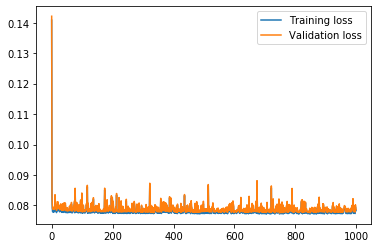

In [32]:
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
_ = plt.ylim()